In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brca-data/brca-R.npy
/kaggle/input/brca-data/brca-vi.h5ad
/kaggle/input/brca-data/brca-xe.h5ad


In [2]:
!pip install scanpy anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 93.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 101.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 42.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.2

In [3]:
# Load data from the separate files instead of BRCA.dmp
import numpy as np
import scanpy as sc

# Load the three data components from the 20250813 SIID Data Dump folder
vi = sc.read_h5ad("/kaggle/input/brca-data/brca-vi.h5ad")
xe = sc.read_h5ad("/kaggle/input/brca-data/brca-xe.h5ad") 
R = np.load("/kaggle/input/brca-data/brca-R.npy")

# Apply the same preprocessing as the original code
vi.var_names_make_unique()
xe.var_names_make_unique()
if hasattr(vi.X, "toarray"): vi.X = vi.X.toarray()
if hasattr(xe.X, "toarray"): xe.X = xe.X.toarray()



# Verify the loaded data structure
print("Visium data (vi) shape:", vi.shape)
print("Xenium data (xe) shape:", xe.shape)
print("Transformation matrix (R) shape:", R.shape)
print("\nVisium genes (first 10):", list(vi.var_names[:10]))
print("Xenium genes (first 10):", list(xe.var_names[:10]))
print("Common genes:", len(set(vi.var_names).intersection(set(xe.var_names))))


# VISIUM DATA VIEWER - Customizable dimensions
rows = 10  # Change this value to view different number of rows
cols = 10  # Change this value to view different number of columns

print("="*50)
print(f"VISIUM DATA ({rows}x{cols} values):")
print("="*50)
print(f"Total shape: {vi.shape}")
print(f"Row names (first {rows} observations):", list(vi.obs_names[:rows]))
print(f"Column names (first {cols} genes):", list(vi.var_names[:cols]))

# Set numpy print options to show full arrays without truncation
np.set_printoptions(threshold=np.inf, suppress=True)
print("Data values:")
print(vi.X[:rows, :cols])

# Display spatial coordinates if available
if 'spatial' in vi.obsm:
    print(f"\nVisium spatial coordinates (first {min(rows, 10)}):")
    print(vi.obsm['spatial'][:min(rows, 10)])

# Reset numpy print options to default
np.set_printoptions(threshold=1000, suppress=False)


# XENIUM DATA VIEWER - Customizable dimensions
rows = 10  # Change this value to view different number of rows
cols = 10  # Change this value to view different number of columns

print("="*50)
print(f"XENIUM DATA ({rows}x{cols} values):")
print("="*50)
print(f"Total shape: {xe.shape}")
print(f"Row names (first {rows} observations):", list(xe.obs_names[:rows]))
print(f"Column names (first {cols} genes):", list(xe.var_names[:cols]))

# Set numpy print options to show full arrays without truncation
np.set_printoptions(threshold=np.inf, suppress=True)
print("Data values:")
print(xe.X[:rows, :cols])

# Display spatial coordinates if available
if 'spatial' in xe.obsm:
    print(f"\nXenium spatial coordinates (first {min(rows, 10)}):")
    print(xe.obsm['spatial'][:min(rows, 10)])

# Reset numpy print options to default
np.set_printoptions(threshold=1000, suppress=False)

# TRANSFORMATION MATRIX R VIEWER - COMPLETE MATRIX
print("="*50)
print(f"COMPLETE TRANSFORMATION MATRIX R:")
print("="*50)
print(f"Total shape: {R.shape} (rows: Xenium cells, cols: Visium spots)")

# Set numpy print options to show ENTIRE matrix without truncation
np.set_printoptions(threshold=np.inf, suppress=True, linewidth=200)

print("\nComplete R matrix data:")
print("Rows = Xenium cells, Columns = Visium spots")
print(R)

# Reset numpy print options to default
np.set_printoptions(threshold=1000, suppress=False, linewidth=75)

print(f"\nMatrix printed completely: {R.shape[0]} rows × {R.shape[1]} columns")

# R MATRIX DIMENSIONS
print("="*50)
print("R MATRIX DIMENSIONS")
print("="*50)
print(f"R matrix shape: {R.shape}")
print(f"Number of rows (Xenium cells): {R.shape[0]}")
print(f"Number of columns (Visium spots): {R.shape[1]}")
print(f"Total elements: {R.size:,}")
print(f"Memory size: {R.nbytes / (1024**2):.2f} MB")

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1798: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Visium data (vi) shape: (4992, 18085)
Xenium data (xe) shape: (167780, 313)
Transformation matrix (R) shape: (3, 3)

Visium genes (first 10): ['SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15', 'AGRN', 'RNF223', 'C1orf159']
Xenium genes (first 10): ['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ', 'AGR3', 'AHSP', 'AIF1']
Common genes: 307
VISIUM DATA (10x10 values):
Total shape: (4992, 18085)
Row names (first 10 observations): ['AACACCTACTATCGAA-1', 'AACACGTGCATCGCAC-1', 'AACACTTGGCAAGGAA-1', 'AACAGGAAGAGCATAG-1', 'AACAGGATTCATAGTT-1', 'AACAGGCCAACGATTA-1', 'AACAGGTTATTGCACC-1', 'AACAGGTTCACCGAAG-1', 'AACAGTCAGGCTCCGC-1', 'AACAGTCCACGCGGTG-1']
Column names (first 10 genes): ['SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15', 'AGRN', 'RNF223', 'C1orf159']
Data values:
[[ 0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
 [ 2.  0.  0.  0.  0.  0.  0.  4.  0.  0.]
 [ 1.  3.  0.  1.  0.  3. 21. 10.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  2.  0.  0.]
 [ 

In [4]:
# --- This is a new cell, run this before running the modified training ---
# --- (This is the content of your old Cell 17) ---

import numpy as np
import pickle
import os.path

version = 2

score_metrics = ["r2", "pcc", "ssim", "rmse", "js", "nnz"]
score_metrics_vs_src = ["r2", "pcc", "ssim", "rmse", "js"]

def score_corr(x, y, metric = "r2"):
    # All-in-one scoring function. All of them are structured such that larger = better correlation.
    # Flatten ndarray if needed
    if isinstance(x, np.ndarray):
        xf = x.flatten()
    else:
        xf = np.array(x)
    if isinstance(y, np.ndarray):
        yf = y.flatten()
    else:
        yf = np.array(y)
    assert len(xf) == len(yf)
    if (np.any(xf == 0)) or (np.any(yf == 0)):
        if metric == "js":
            xf = xf + 1e-10
            yf = yf + 1e-10
    if (np.std(xf) < 1e-5) or (np.std(yf) < 1e-5):
        if metric in ['r2', 'pcc', 'ssim']:
            return 0
        elif metric == 'rmse':
            return -1
    n = len(xf)
    # The following 5 metrics comes from the Nat Meth paper
    if metric == "r2":
        corr_matrix = np.corrcoef(xf, yf)
        return corr_matrix[0, 1]**2
    elif metric == "pcc":
        mx, my = np.mean(xf), np.mean(yf)
        a = np.mean((xf - mx) * (yf - my))
        b = np.std(xf) * np.std(yf)
        return a / b
    elif metric == "ssim":
        x_, y_ = xf / max(xf), yf / max(yf)
        mx, my = np.mean(x_), np.mean(y_)
        sx, sy = np.std(x_), np.std(y_)
        cov = np.cov(x_, y_)[0][1]
        c1 = 0.01
        c2 = 0.03
        return (2 * mx * my + c1 ** 2) * (2 * cov + c2 ** 2) / (mx ** 2 + my ** 2 + c1 ** 2) / (sx ** 2 + sy ** 2 + c2 ** 2)
    elif metric == "rmse":
        mx, my = np.mean(xf), np.mean(yf)
        sx, sy = np.std(xf), np.std(yf)
        zx = (xf - mx) / sx
        zy = (yf - my) / sy
        avg = np.mean((zx - zy) ** 2)
        return - (avg ** 0.5)
    elif metric == "js":
        xf = xf / sum(xf)
        yf = yf / sum(yf)
        return - (np.sum(xf * np.log(xf / yf)) + np.sum(yf * np.log(yf / xf))) / 2
    elif metric == "nnz":
        # A custom metric. It works as follows: Identify non-zero elements in x, and estimate the overlap between the indices
        # and the top-N indices in y (N = # nnz).
        # Different from everything else: requires x and y to be ordered - x be the observation and y be the estimate.
        nnz = xf > 0.1
        count = sum(nnz)
        if count == 0:
            return 0  # x is all-zero, meaningless
        sorted_est = np.argsort(yf)
        overlap = 0
        for i in sorted_est[-count:]:
            overlap += nnz[i]
        return overlap / count

def avg_corr_by_row(gt, est, met = "r2", eps = 0):
    assert gt.shape == est.shape
    data = []
    for i in range(gt.shape[0]):
        data.append(score_corr(gt[i] + eps, est[i] + eps, metric = met))
    return sum(data) / len(data)

def corr_by_col(gt, est, met = "r2", eps = 0):
    assert gt.shape == est.shape
    data = []
    for i in range(gt.shape[1]):
        data.append(score_corr(gt[:, i] + eps, est[:, i] + eps, metric = met))
    return data

def avg_corr_by_col(gt, est, met = "r2", eps = 0):
    return np.mean(corr_by_col(gt, est, met, eps))

In [5]:
import numpy as np
from scipy.sparse import csr_matrix
from anndata import AnnData
from scipy.spatial import KDTree  # <-- THIS LINE IS THE FIX

def apply(proj, p):
    return proj.dot(np.concatenate((p, [1])))[:2]
    
def batch_apply(proj, ps):
    ret = np.zeros_like(ps)
    for i in range(ps.shape[0]):
        ret[i] = apply(proj, ps[i])
    return ret


def gen_gamma(vi_sp, xe_sp, max_radius = 100, exclusive = True):
    assert exclusive
    ret = np.zeros((xe_sp.shape[0], vi_sp.shape[0]))
    kdt = KDTree(vi_sp) # This will now work
    for i in range(xe_sp.shape[0]):
        d, vi_idx = kdt.query(xe_sp[i])
        if d <= max_radius:
            ret[i, vi_idx] = 1
    return ret

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from anndata import AnnData
from scipy.sparse import csr_matrix, issparse
import numpy as np

# --- Helper functions (same as before) ---
def to_dense_mat(ad, eps):
    if issparse(ad.X):
        mat = ad.X.toarray()
    else:
        mat = ad.X
    return mat + eps

def convert_to_sparse_csr_tensor(array):
    if not issparse(array):
        array = csr_matrix(array)
    crow_indices = torch.tensor(array.indptr, dtype=torch.int64)
    col_indices = torch.tensor(array.indices, dtype=torch.int64)
    values = torch.tensor(array.data, dtype=torch.float32)
    sparse_csr_tensor = torch.sparse_csr_tensor(crow_indices, col_indices, values, size=array.shape)
    return sparse_csr_tensor.to_sparse()
# ----------------------------------------


class JointAutoencoder(nn.Module):
    """
    NEW VERSION: Non-linear Encoder, Linear Decoder (like NMF's Q matrix)
    
    This avoids building the giant (n_cells, n_total_genes) tensor in memory 
    by calculating the two losses separately.
    
    NOTE: The 'train_model' method has been REMOVED. The training loop
    will now be managed externally by the 'impute_genes' function.
    """
    def __init__(self, xe: AnnData, vi: AnnData, gamma: np.ndarray, n_factors: int, device: str = 'cpu'):
        super().__init__()
        
        self.device = device
        
        # --- Data setup ---
        self.num_xenium_cells = xe.shape[0]
        self.num_visium_spots = vi.shape[0]
        self.num_xenium_genes = xe.shape[1]
        self.num_total_genes = vi.shape[1] # Full transcriptome gene count
        self.n_factors = n_factors

        # Observed data
        self.X = torch.tensor(to_dense_mat(xe, 0), dtype=torch.float32).to(device)
        self.V = torch.tensor(to_dense_mat(vi, 0), dtype=torch.float32).to(device)

        # Spatial mapping matrix (Gamma)
        self.gamma = convert_to_sparse_csr_tensor(gamma).to(device)

        # --- Model Parameters ---
        
        # 1. Encoder (Non-linear P matrix)
        self.encoder = nn.Sequential(
            nn.Linear(self.num_xenium_genes, 128),
            nn.ReLU(),
            nn.Linear(128, self.n_factors),
            nn.Softmax(dim=1) 
        ).to(device)

        # 2. Decoder (Linear Q matrix)
        self.decoder_Q = nn.Parameter(
            torch.randn((self.n_factors, self.num_total_genes), dtype=torch.float32).to(device)
        )
        nn.init.xavier_uniform_(self.decoder_Q)

        # 3. Scaling factors
        self.scale_factor_xenium = nn.Parameter(
            torch.ones((self.num_xenium_cells, 1), dtype=torch.float32).to(device))
        
        self.scale_factor_visium = nn.Parameter(
            torch.ones((self.num_xenium_cells, 1), dtype=torch.float32).to(device))

        self.platform_sf = nn.Parameter(
            torch.zeros((1, self.num_xenium_genes), dtype=torch.float32).to(device))

    
    @property
    def Q_soft(self):
        # Apply non-negativity to the Q matrix (decoder)
        return F.softplus(self.decoder_Q)

    def get_losses(self):
        """
        Calculates the two-part loss in a memory-efficient way.
        """
        # 1. Get latent representation P (small tensor)
        z = self.encoder(self.X)
        
        # --- 2. Imputation Loss (Xenium) ---
        a_x_recon = z @ self.Q_soft[:, :self.num_xenium_genes] 
        a_x_recon_scaled = torch.exp(self.scale_factor_xenium) * a_x_recon
        a_x_recon_scaled = a_x_recon_scaled * torch.exp(self.platform_sf)
        loss_x = F.poisson_nll_loss(a_x_recon_scaled, self.X, log_input=False, reduction='sum')

        # --- 3. Deconvolution Loss (Visium) ---
        z_scaled = torch.exp(self.scale_factor_visium) * z
        z_visium = torch.sparse.mm(self.gamma.T, z_scaled)
        a_v_recon = z_visium @ self.Q_soft
        loss_v = F.poisson_nll_loss(a_v_recon, self.V, log_input=False, reduction='sum')

        # --- Total Loss ---
        total_loss = loss_x + loss_v
        
        return total_loss, loss_x, loss_v

    def get_imputed_expression(self, batch_size=1024):
        """
        Returns the final imputed full transcriptome for Xenium cells.
        This part DOES create the large tensor, so we do it in batches.
        """
        self.eval() # Set model to evaluation mode
        
        with torch.no_grad():
            z_full = self.encoder(self.X) # Shape [167780, 20]
            q_soft_full = self.Q_soft     # Shape [20, 18085]

        imputed_data = np.zeros((self.num_xenium_cells, self.num_total_genes), dtype=np.float32)
        
        # This print statement is now handled in the main loop
        # print(f"Generating full imputed matrix in batches of {batch_size}...")
        
        for i in range(0, self.num_xenium_cells, batch_size):
            z_batch = z_full[i : i + batch_size]
            
            with torch.no_grad():
                a_u_recon_batch = z_batch @ q_soft_full
                a_u_recon_scaled = torch.exp(self.scale_factor_xenium[i : i + batch_size]) * a_u_recon_batch
                a_u_recon_scaled[:, :self.num_xenium_genes] = a_u_recon_scaled[:, :self.num_xenium_genes] * torch.exp(self.platform_sf)
            
            imputed_data[i : i + batch_size] = a_u_recon_scaled.cpu().numpy()
            
        # This print statement is also handled externally
        # print("Imputation complete.")
        return imputed_data

In [7]:
import torch
import time
import numpy as np
from anndata import AnnData
import os # <-- Import os for file path checking

# --- prepare_data function (unchanged) ---
def prepare_data(vi_, xe_, holdouts, R):
    vi, xe = vi_.copy(), xe_.copy()
    # Note: This spatial transform might not be needed if your AE handles alignment,
    # but we'll keep it for now to match the NMF workflow.
    vi.obsm['spatial'] = batch_apply(R, vi.obsm['spatial'])
    gamma = gen_gamma(vi.obsm['spatial'], xe.obsm['spatial'])
    
    vcols = set(vi.var_names)
    xcols = set(xe.var_names)
    common_genes = vcols.intersection(xcols)
    hcols = set(holdouts).intersection(common_genes)
    train_genes = common_genes - hcols
    
    # For impute_genes, test_genes = hcols. For infer_latent_types, test_genes = []
    # This logic handles both:
    test_genes = hcols - train_genes 
    
    sorted_xe = xe[:, list(train_genes)].copy()
    
    # We need all genes in Visium for the decoder's output shape
    # So we'll use all vi.var_names for the sorted_vi object
    sorted_vi = vi.copy() # Using all genes now
    
    return sorted_vi, sorted_xe, gamma

# --- impute_genes function (MODIFIED WITH CHECKPOINTING) ---
def impute_genes(vi, xe, holdouts, hdim, R = None, ent_div = 1000, seed = 10042, lr = 1e-3, epochs = 5000, device = "cuda:0", 
                 checkpoint_freq = 500, 
                 save_path = "best_imputed_xenium.npy", 
                 checkpoint_path = "model_checkpoint.pth", 
                 load_checkpoint = False):
    """
    MODIFIED to include saving/loading of model checkpoints for resumable training.
    
    Args:
        ent_div (float): Divisor for the entropy regularization term.
        checkpoint_freq (int): How often (in epochs) to calculate R2 and check for saving.
        save_path (str): File path to save the best .npy output data.
        checkpoint_path (str): File path to save the resumable .pth model state.
        load_checkpoint (bool): If True, will try to load from 'checkpoint_path' and resume.
    """
    t = time.time()
    if R is None:
        R = np.eye(3)
    
    # 1. Prepare data (same as before)
    sorted_vi, sorted_xe, gamma = prepare_data(vi, xe, holdouts, R)
    
    # 2. Get Ground Truth data for R2 calculation
    gt_holdout_genes = [g for g in holdouts if g in vi.var_names]
    gt_holdouts_ad = xe[:, gt_holdout_genes].copy()
    
    full_gene_list = list(sorted_vi.var_names)
    try:
        gt_indices = [full_gene_list.index(g) for g in gt_holdout_genes]
    except ValueError as e:
        print(f"FATAL ERROR: A holdout gene was not found in the full Visium gene list. {e}")
        return
        
    print(f"Tracking R2 score for {len(gt_holdout_genes)} holdout genes.")
    print(f"Best model output data will be saved to: {save_path}")
    print(f"Best model checkpoint will be saved to: {checkpoint_path}")

    # 3. Initialize model and optimizer
    torch.manual_seed(seed)
    np.random.seed(seed)
    
    model = JointAutoencoder(sorted_xe,
                             sorted_vi,
                             gamma,
                             n_factors = hdim,
                             device = device)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    # --- [NEW] CHECKPOINT LOADING LOGIC ---
    start_epoch = 0
    best_r2_score = -np.inf # Initialize with a very bad score

    if load_checkpoint and os.path.exists(checkpoint_path):
        try:
            print(f"Loading checkpoint from {checkpoint_path}...")
            # Load checkpoint onto the correct device
            checkpoint = torch.load(checkpoint_path, map_location=device)
            
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            start_epoch = checkpoint['epoch'] + 1 # Start from the epoch *after* the saved one
            best_r2_score = checkpoint['best_r2_score']
            
            print(f"Successfully loaded checkpoint. Resuming from epoch {start_epoch}.")
            print(f"Previous best R2: {best_r2_score:.6f}")
            
        except Exception as e:
            print(f"Error loading checkpoint: {e}")
            print("Starting training from scratch (epoch 0).")
            start_epoch = 0
            best_r2_score = -np.inf
    elif load_checkpoint:
        print(f"NOTE: 'load_checkpoint=True' but file not found at '{checkpoint_path}'. Starting from scratch.")
    else:
        print("Starting training from scratch (epoch 0).")
    # --- [END NEW SECTION] ---

    
    # 4. Training loop with checkpointing
    print(f"Starting model training from epoch {start_epoch}...")
    
    # [MODIFIED] Loop now starts from 'start_epoch'
    for epoch in range(start_epoch, epochs + 1):
        # --- Standard training step ---
        model.train() # Set model to training mode
        optimizer.zero_grad()
        
        recon_loss, loss_x, loss_v = model.get_losses()
        
        reg_loss = torch.tensor(0.0, device=device) # Default to 0
        if hasattr(model, 'entropy_loss'):
            reg_loss = model.entropy_loss / ent_div
        elif epoch == start_epoch: # Print warning only once
            print(f"\n[WARNING] 'model' has no attribute 'entropy_loss'.")
            print("Regularization term is NOT being added. 'ent_div' is unused.\n")
        
        total_loss = recon_loss + reg_loss
        
        total_loss.backward()
        optimizer.step()
        # -----------------------------
        
        # --- Checkpointing Logic ---
        if epoch % checkpoint_freq == 0:
            model.eval() # Set model to evaluation mode for inference
            
            print(f"\n--- Epoch {epoch}/{epochs} ---")
            print(f"Losses: Total={total_loss.item():.2f} (Recon={recon_loss.item():.2f}, Reg={reg_loss.item():.2f})")
            print(f"        (Xenium={loss_x.item():.2f}, Visium={loss_v.item():.2f})")
            
            print(f"Running checkpoint evaluation (calculating R2)...")
            imputed_data = model.get_imputed_expression(batch_size=4096) 
            
            pred_holdouts_X = imputed_data[:, gt_indices]
            
            current_r2 = avg_corr_by_col(gt_holdouts_ad.X, pred_holdouts_X, met="r2")
            
            print(f"Checkpoint R2: {current_r2:.6f} (Best so far: {best_r2_score:.6f})")
            
            # Check if this is the new best score
            if current_r2 > best_r2_score:
                best_r2_score = current_r2
                print(f"*** New best R2! Saving imputed matrix ({imputed_data.shape}) to {save_path} ***")
                # Save the *full* imputed matrix
                np.save(save_path, imputed_data)
                
                # --- [NEW] SAVE MODEL CHECKPOINT ---
                print(f"*** Saving model checkpoint to {checkpoint_path} ***")
                state = {
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'best_r2_score': best_r2_score,
                }
                torch.save(state, checkpoint_path)
                # --- [END NEW SECTION] ---
                
            else:
                print("R2 did not improve. Not saving.")
                
    # 5. Finalize and return
    print(f"\n--- Training Finished ---")
    print(f"Total time (seconds): {time.time() - t}")
    print(f"Loading best saved imputed matrix from '{save_path}' (Best R2: {best_r2_score:.6f})")
    
    if not os.path.exists(save_path):
        print("Warning: No save file found. This can happen if R2 never improved or was always negative.")
        print("Returning the imputation from the *final* epoch.")
        # 'imputed_data' will hold the result from the last checkpoint
        # This requires imputed_data to be defined. Let's ensure it is.
        if 'imputed_data' not in locals():
            print("Error: No 'imputed_data' available. Running final inference.")
            model.eval()
            imputed_data = model.get_imputed_expression(batch_size=4096)
            
        best_imputed_data = imputed_data
    else:
        best_imputed_data = np.load(save_path)
    
    # Create the final AnnData object using the best saved data
    full_pred = AnnData(X = best_imputed_data, obs = sorted_xe.obs, var = sorted_vi.var)
    
    # Return only the holdout genes, as in the original function
    print("Returning AnnData of *holdout genes* from the best imputation.")
    return full_pred[:, [g for g in holdouts if g in full_pred.var_names]].copy()

In [8]:
# import sys
# import os.path

# holdouts = list(xe.var_names)[::10]

# # Call the modified function
# # We set checkpoint_freq=500 to match your request
# # The 'print_freq' argument is gone, as it's handled by 'checkpoint_freq'
# ret = impute_genes(vi, xe, holdouts, 20, R, 
#                    lr = 1e-2, 
#                    epochs = 50000, 
#                    device="cuda", 
#                    checkpoint_freq=500, 
#                    save_path="best_imputed_xenium.npy")

In [9]:
# # 1. Score the 'ret' object returned by the function
# # This should already be from the best model
# print('Scoring the AnnData object returned by the function:')
# avg_r2_ret = avg_corr_by_col(ret.X, xe[:, ret.var_names].X)
# print(f'Average holdout R^2 (from returned object): {avg_r2_ret}')

# print('\n' + '='*50 + '\n')

# # 2. Load the saved .npy file and score it manually
# save_path = "best_imputed_xenium.npy"
# print(f'Loading and scoring the saved file: {save_path}')

# # Load the full imputed matrix
# best_imputed_data_from_file = np.load(save_path)

# # Get the ground truth data for holdouts
# gt_holdout_genes = [g for g in holdouts if g in xe.var_names]
# gt_holdouts_ad = xe[:, gt_holdout_genes].copy()

# # Get the indices of the holdout genes in the *full* gene list
# full_gene_list = list(vi.var_names) # 'vi' is the full-gene AnnData
# gt_indices = [full_gene_list.index(g) for g in gt_holdout_genes]

# # Slice the loaded numpy array
# pred_holdouts_from_file = best_imputed_data_from_file[:, gt_indices]

# # Score it
# avg_r2_file = avg_corr_by_col(gt_holdouts_ad.X, pred_holdouts_from_file, met="r2")
# print(f'Average holdout R^2 (from loaded .npy file): {avg_r2_file}')

# print(f'\nScores match: {np.isclose(avg_r2_ret, avg_r2_file)}')

In [10]:
import torch
import torch.nn as nn
import time
import numpy as np
from anndata import AnnData

def infer_latent_types(vi, xe, hdim, R = None, seed = 10042, lr = 1e-3, epochs = 5000, device = "cuda:0"):
    """
    Adapted version of infer_latent_types to use the JointAutoencoder model 
    from the notebook.
    """
    t = time.time()
    if R is None:
        R = np.eye(3)
    
    # 1. Prepare data (uses prepare_data function from your notebook)
    # Note: holdouts = [] is correct for deconvolution
    sorted_vi, sorted_xe, gamma = prepare_data(vi, xe, [], R) 
    
    torch.manual_seed(seed)
    np.random.seed(seed)
    
    # 2. Initialize the JointAutoencoder model (from your notebook's Cell 6)
    model = JointAutoencoder(sorted_xe,
                             sorted_vi,
                             gamma,
                             n_factors = hdim,
                             device = device)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    # 3. Training loop (adapted from your notebook's Cell 7)
    print(f"Starting model training for deconvolution ({epochs} epochs)...")
    t_start_train = time.time()
    
    for epoch in range(epochs + 1):
        model.train() # Set model to training mode
        optimizer.zero_grad()
        
        # Get losses from the JointAutoencoder
        total_loss, loss_x, loss_v = model.get_losses()
        
        total_loss.backward()
        optimizer.step()
        
        # Mimic print_freq = 500 from the original function
        if epoch % 500 == 0 or epoch == epochs:
            print(f"--- Epoch {epoch}/{epochs} ---")
            print(f"Losses: Total={total_loss.item():.2f}, Xenium={loss_x.item():.2f}, Visium={loss_v.item():.2f}")
            
    print(f"Training loop finished in (seconds): {time.time() - t_start_train}")

    # 4. Get latent factors (Px and Pv) from the trained model
    print("Extracting latent factors (cell type compositions)...")
    model.eval() # Set model to evaluation mode
    with torch.no_grad():
        # Px_soft is the latent representation from the encoder
        px_soft_tensor = model.encoder(model.X)
        
        # Scale the Xenium latent factors
        z_scaled = torch.exp(model.scale_factor_visium) * px_soft_tensor
        
        # Aggregate Xenium factors to Visium spots (gamma.T @ z_scaled)
        pv_tensor = torch.sparse.mm(model.gamma.T, z_scaled)
    
    # Convert to numpy arrays
    ret_x = px_soft_tensor.detach().cpu().numpy()
    ret_v = pv_tensor.detach().cpu().numpy()
    
    # Normalize Visium factors (same as original function)
    ret_v = ret_v / (1e-10 + np.sum(ret_v, axis = 1, keepdims = True))
    
    # 5. Create AnnData objects for results
    Px = AnnData(X = ret_x, obs = sorted_xe.obs, obsm = sorted_xe.obsm)
    Pv = AnnData(X = ret_v, obs = sorted_vi.obs, obsm = sorted_vi.obsm)
    
    print(f"--- Deconvolution Finished ---")
    print(f"Total time (seconds): {time.time() - t}")
    
    return Px, Pv

In [11]:
Px, Pv = infer_latent_types(vi, xe, 20, R, lr = 1e-2, epochs = 25000)

/tmp/ipykernel_48/255892550.py:22: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at /pytorch/aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  sparse_csr_tensor = torch.sparse_csr_tensor(crow_indices, col_indices, values, size=array.shape)


Starting model training for deconvolution (25000 epochs)...
--- Epoch 0/25000 ---
Losses: Total=4535617536.00, Xenium=77118312.00, Visium=4458499072.00
--- Epoch 500/25000 ---
Losses: Total=106431344.00, Xenium=12583524.00, Visium=93847824.00
--- Epoch 1000/25000 ---
Losses: Total=42595072.00, Xenium=12319652.00, Visium=30275420.00
--- Epoch 1500/25000 ---
Losses: Total=27398614.00, Xenium=12273508.00, Visium=15125106.00
--- Epoch 2000/25000 ---
Losses: Total=21432432.00, Xenium=12255118.00, Visium=9177314.00
--- Epoch 2500/25000 ---
Losses: Total=18542486.00, Xenium=12246119.00, Visium=6296366.50
--- Epoch 3000/25000 ---
Losses: Total=16952352.00, Xenium=12241474.00, Visium=4710879.00
--- Epoch 3500/25000 ---
Losses: Total=16005776.00, Xenium=12238986.00, Visium=3766790.00
--- Epoch 4000/25000 ---
Losses: Total=15418619.00, Xenium=12237620.00, Visium=3180998.75
--- Epoch 4500/25000 ---
Losses: Total=15050358.00, Xenium=12236848.00, Visium=2813510.50
--- Epoch 5000/25000 ---
Losses: To

/tmp/ipykernel_48/3523149260.py:5: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(Px, color = [i], spot_size=30, title = f"Xenium Latent Factor {i}", color_map = "Reds")


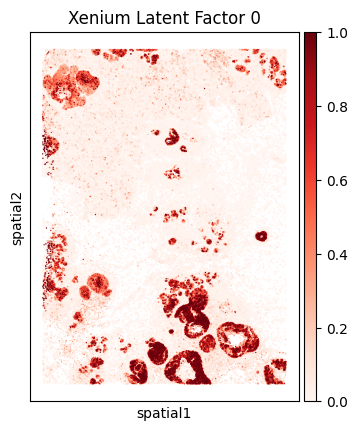

/tmp/ipykernel_48/3523149260.py:6: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(Pv, color = [i], spot_size=80, title = f"Visium Latent Factor {i}", color_map = "Reds")


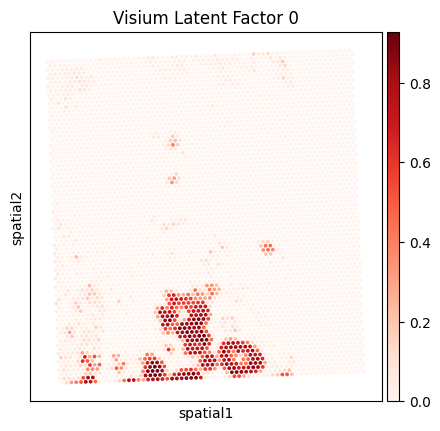

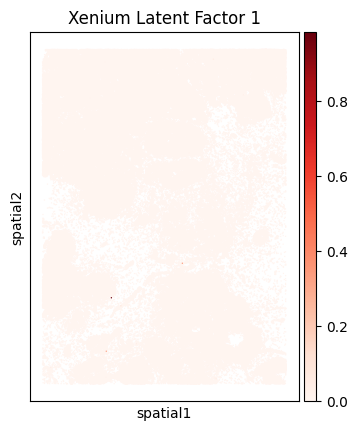

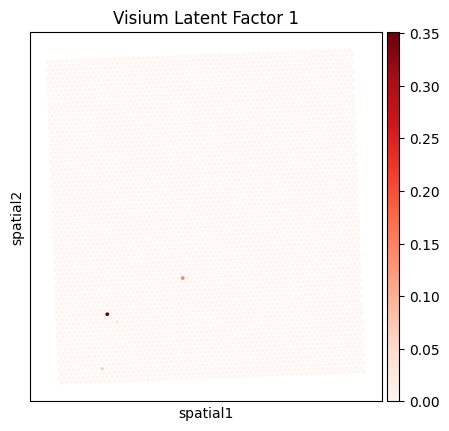

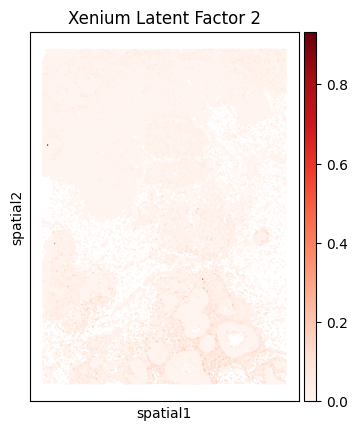

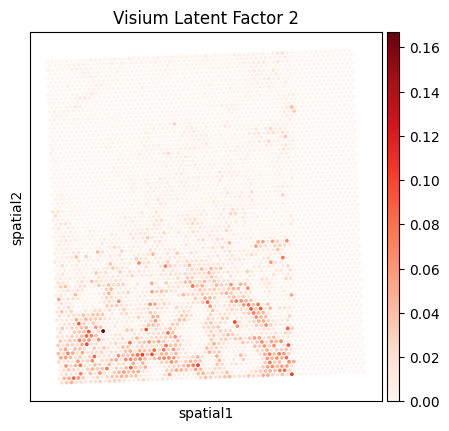

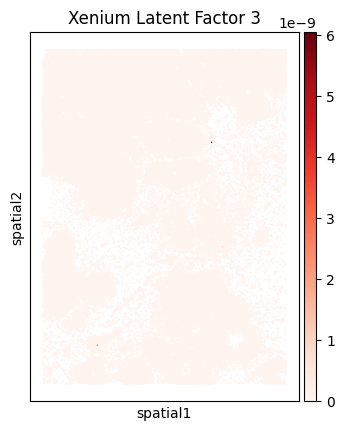

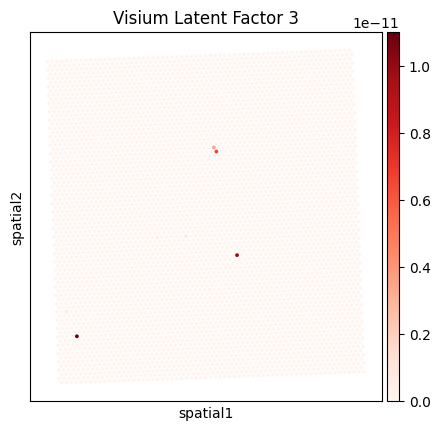

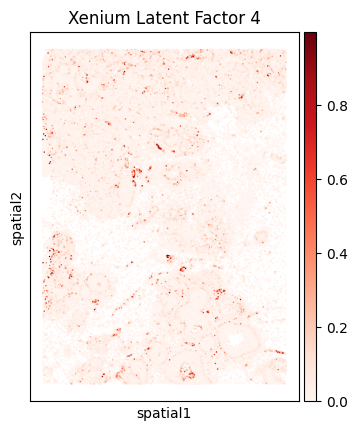

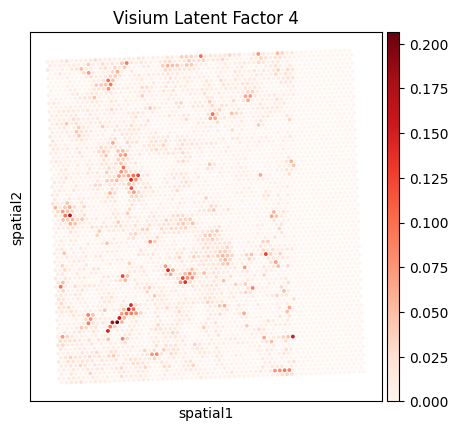

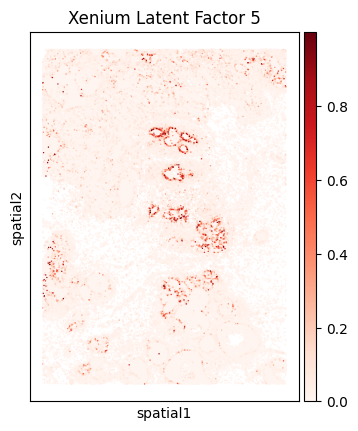

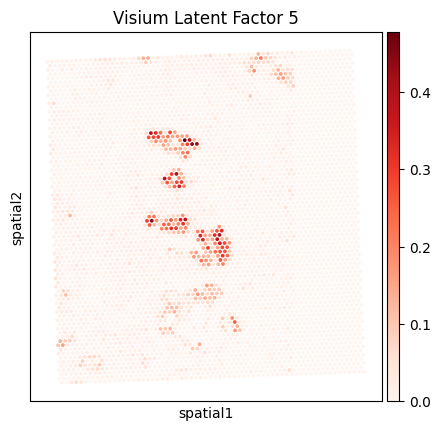

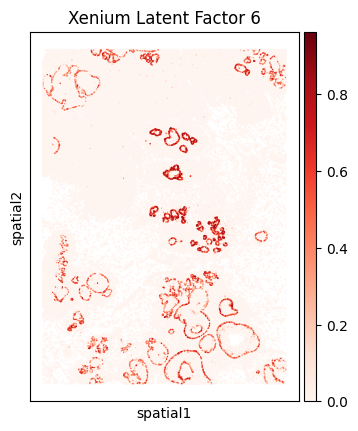

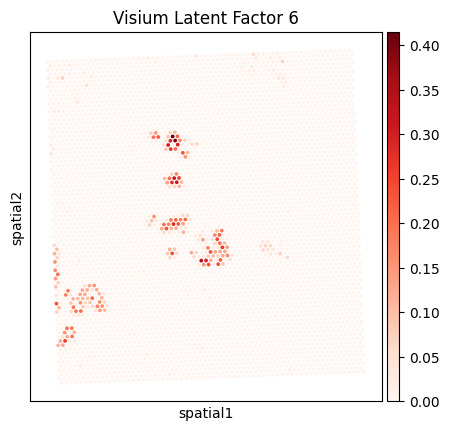

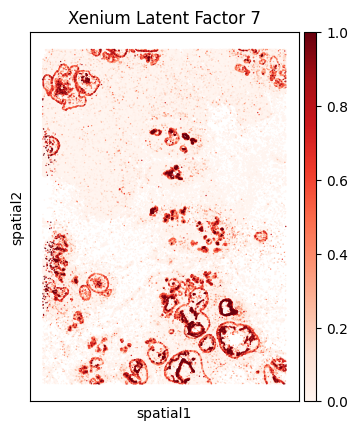

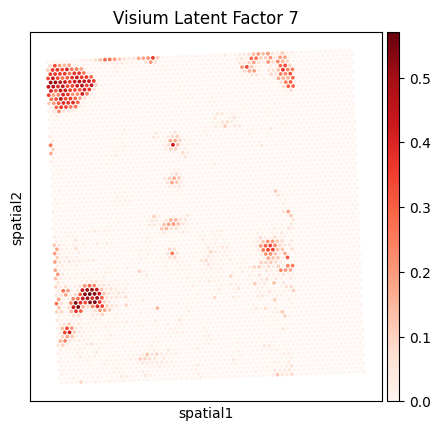

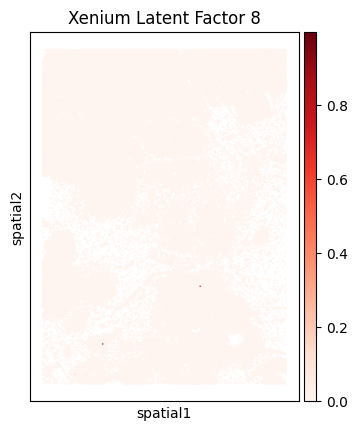

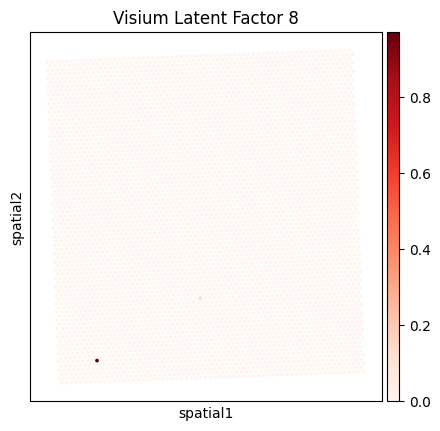

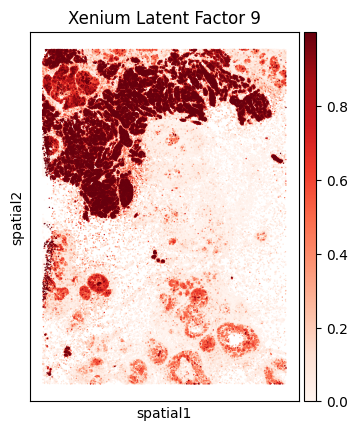

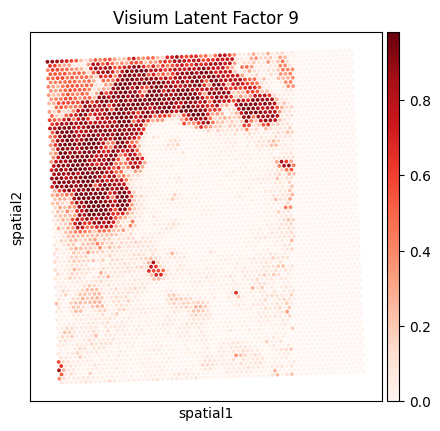

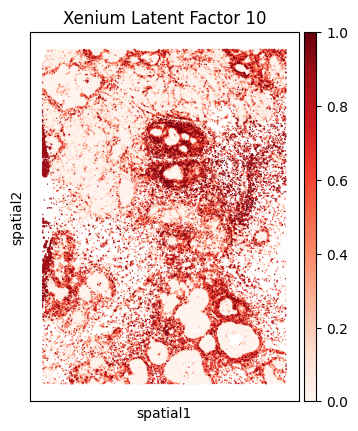

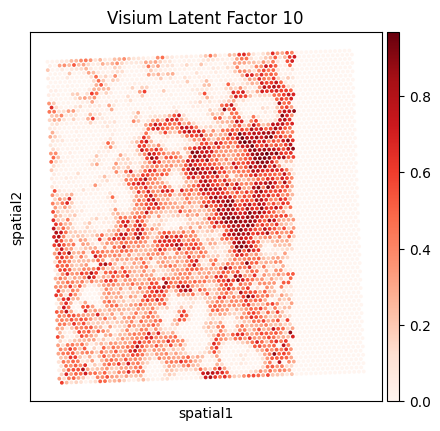

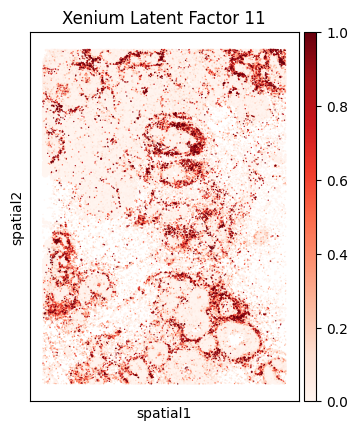

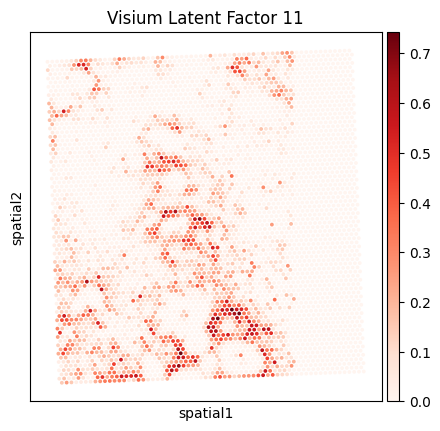

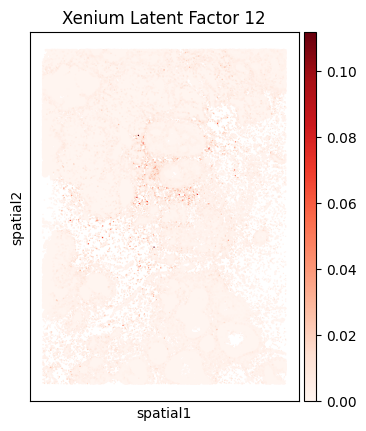

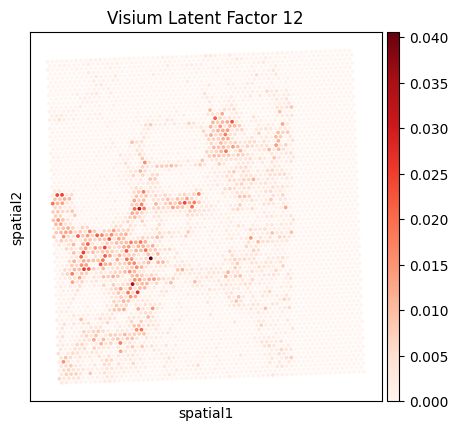

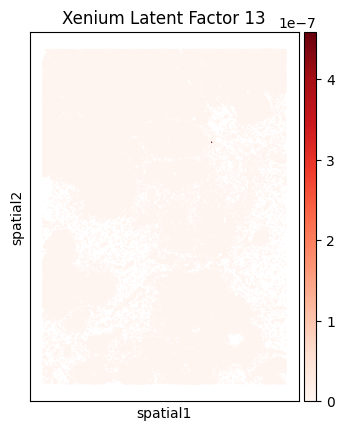

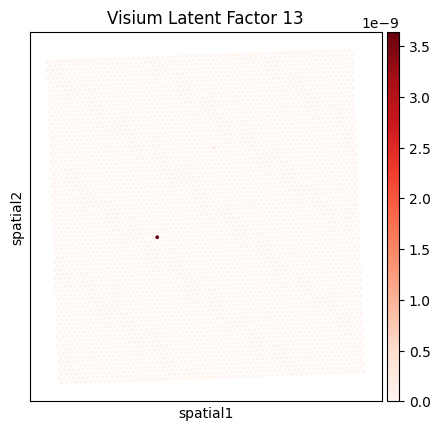

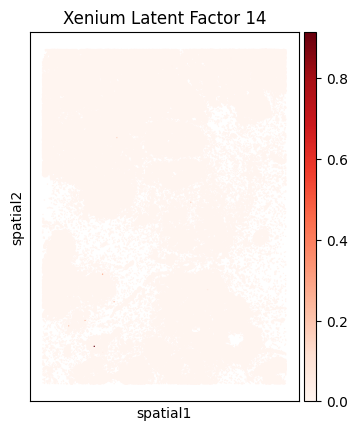

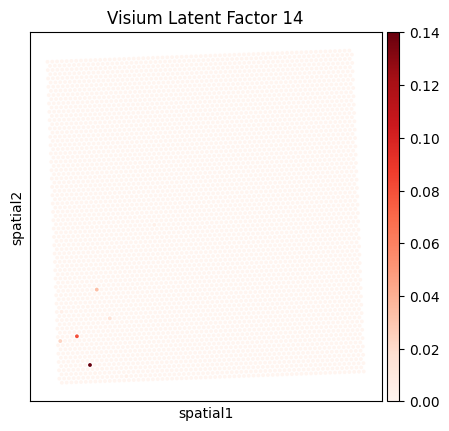

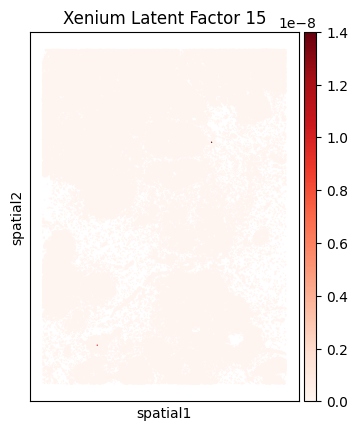

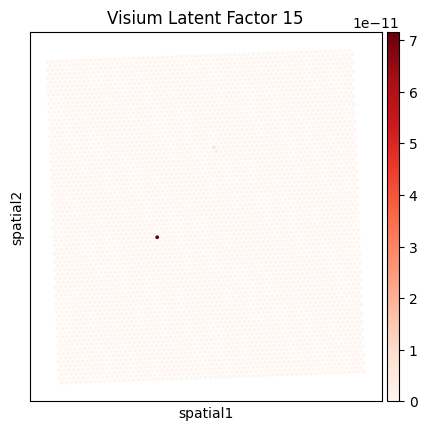

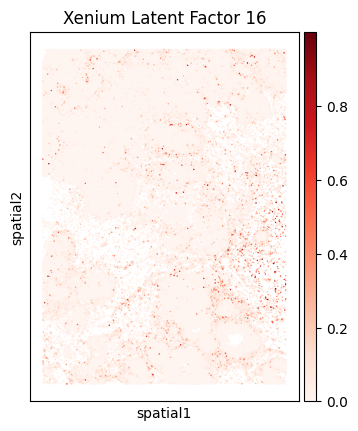

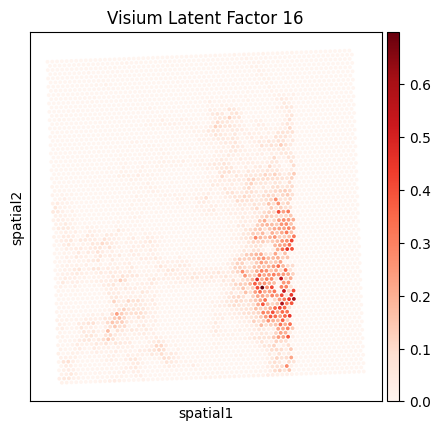

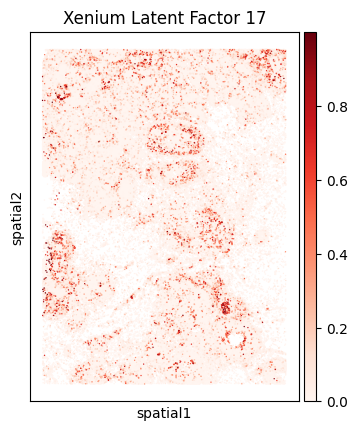

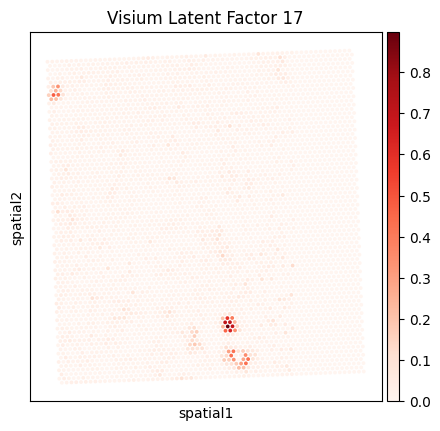

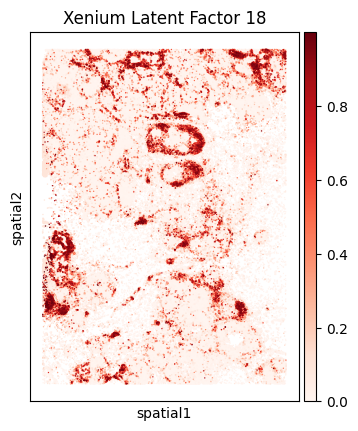

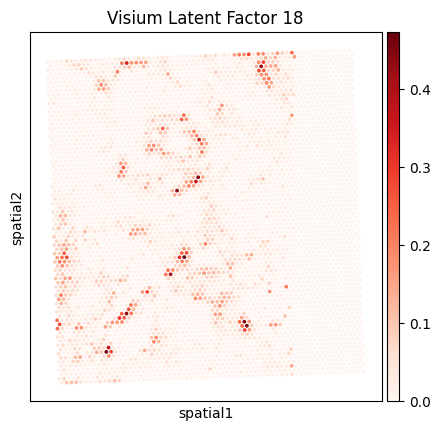

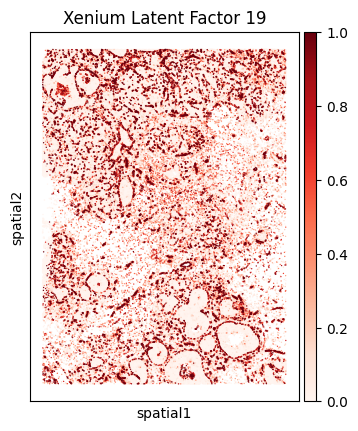

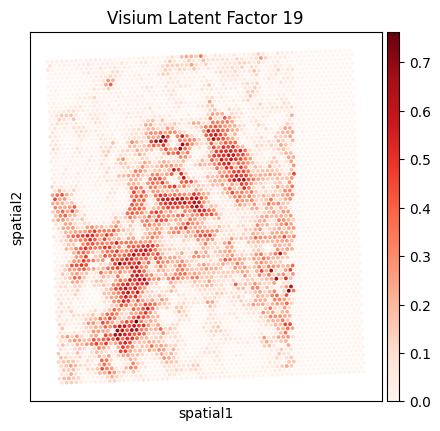

In [12]:
for i in range(20):
    Px.obs[i] = Px.X[:, i]
    Pv.obs[i] = Pv.X[:, i]
for i in range(20):
    sc.pl.spatial(Px, color = [i], spot_size=30, title = f"Xenium Latent Factor {i}", color_map = "Reds")
    sc.pl.spatial(Pv, color = [i], spot_size=80, title = f"Visium Latent Factor {i}", color_map = "Reds")